In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

In [24]:
spy = yf.download("SPY", start = '2018-01-01', end = '2024-01-01')
spy

/var/folders/gx/p5qhhh8s7rg2_ywh443qwth80000gn/T/ipykernel_89514/2246719550.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  spy = yf.download("SPY", start = '2018-01-01', end = '2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2018-01-02,238.568710,238.604223,237.352659,237.743220,86655700
2018-01-03,240.077652,240.228561,238.737320,238.737320,90070400
2018-01-04,241.089554,241.577767,240.139809,240.725649,80636400
2018-01-05,242.696259,242.820513,241.391439,241.888510,83524000
2018-01-08,243.140030,243.299797,242.305654,242.598561,57319200
...,...,...,...,...,...
2023-12-22,464.874420,466.572378,462.960567,465.080521,67160400
2023-12-26,466.837372,467.750134,465.208124,465.286659,55387000


In [25]:
spy.iloc[1]

Price   Ticker
Close   SPY       2.400777e+02
High    SPY       2.402286e+02
Low     SPY       2.387373e+02
Open    SPY       2.387373e+02
Volume  SPY       9.007040e+07
Name: 2018-01-03 00:00:00, dtype: float64

In [26]:
#Data is fine, no cleaning necessary as such
spy.isna().sum()

Price   Ticker
Close   SPY       0
High    SPY       0
Low     SPY       0
Open    SPY       0
Volume  SPY       0
dtype: int64

In [27]:
spy.to_csv("/Users/sudhanvabharadwaj/Desktop/Interview_Practice/Regime_Momentum/Data/spy.csv")

In [28]:
spy.columns

MultiIndex([( 'Close', 'SPY'),
            (  'High', 'SPY'),
            (   'Low', 'SPY'),
            (  'Open', 'SPY'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])

In [30]:
# drop the 'Ticker' level if only one ticker
spy.columns = spy.columns.droplevel('Ticker')
spy.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [31]:
spy.to_csv("/Users/sudhanvabharadwaj/Desktop/Interview_Practice/Regime_Momentum/Data/spy.csv")

In [33]:
spy.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=1509, freq=None)

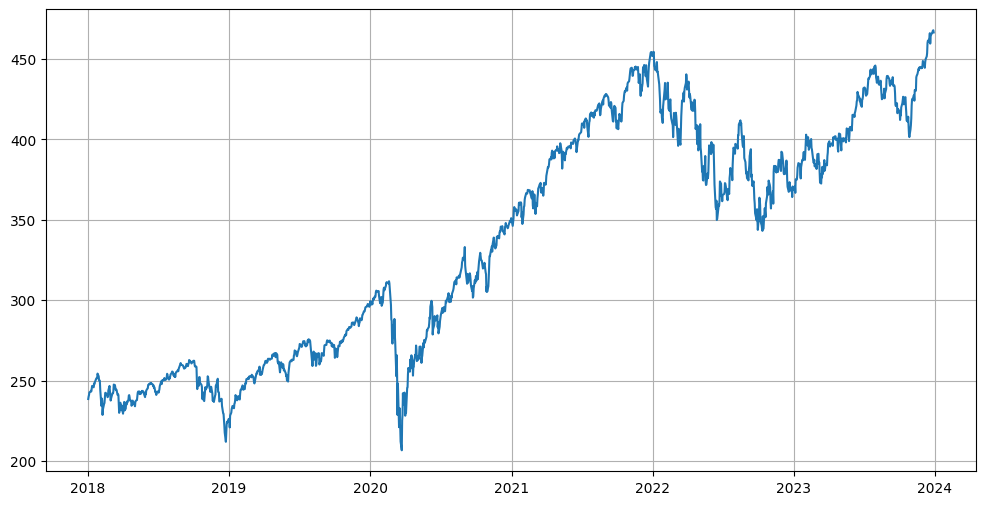

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(spy.index ,spy['Close'])

plt.grid()

plt.show()

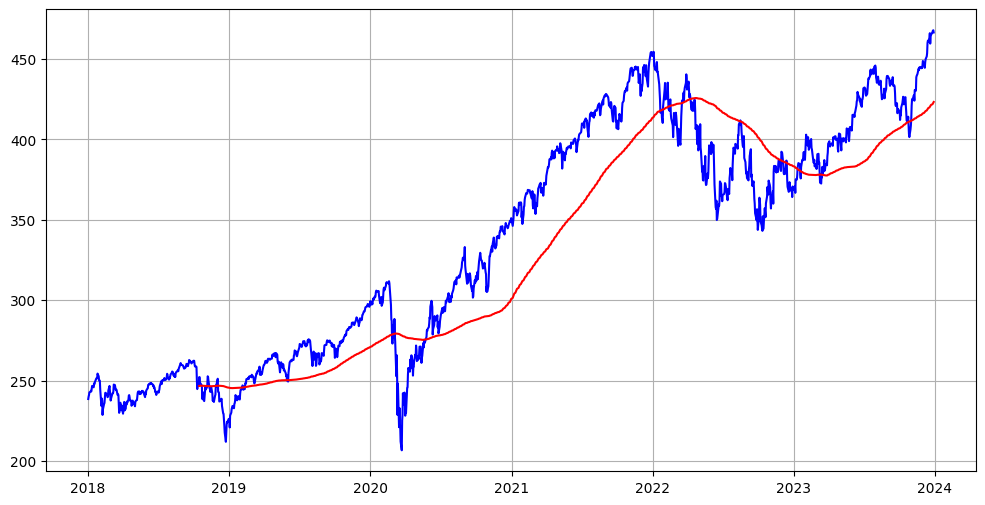

In [35]:
spy["200_sma"] = spy['Close'].rolling(window=200).mean()

plt.figure(figsize=(12,6))

plt.plot(spy.index ,spy['Close'], color="blue")
plt.plot(spy.index, spy["200_sma"], color="red")

plt.grid()

plt.show()

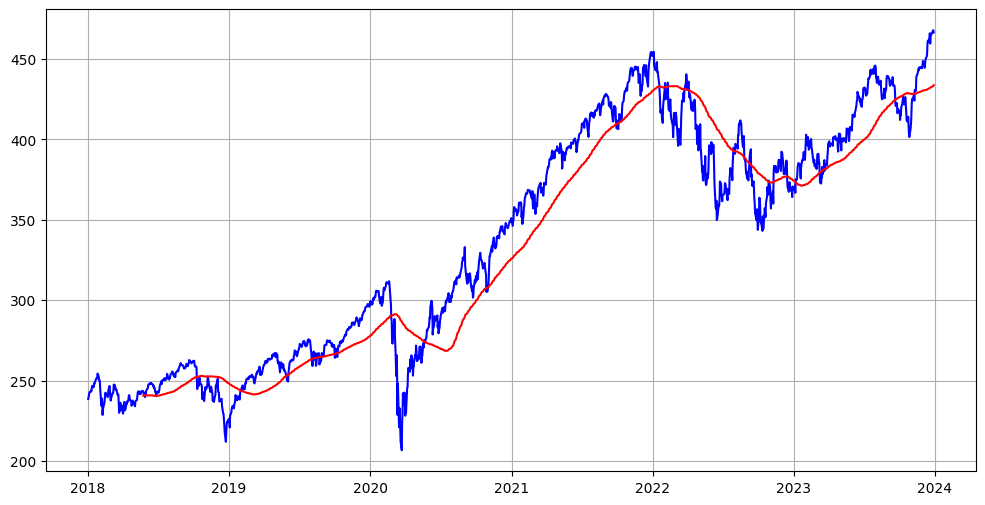

In [37]:
spy["100_sma"] = spy['Close'].rolling(window=100).mean()

plt.figure(figsize=(12,6))

plt.plot(spy.index ,spy['Close'], color="blue")
plt.plot(spy.index, spy["100_sma"], color="red")

plt.grid()

plt.show()

In [38]:
import pandas_ta as pta

spy['RSI'] = pta.rsi(spy['Close'], length=14)

/Users/sudhanvabharadwaj/.local/share/virtualenvs/RakathonProject-YVYs4Bwg/lib/python3.12/site-packages/pandas_ta/__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


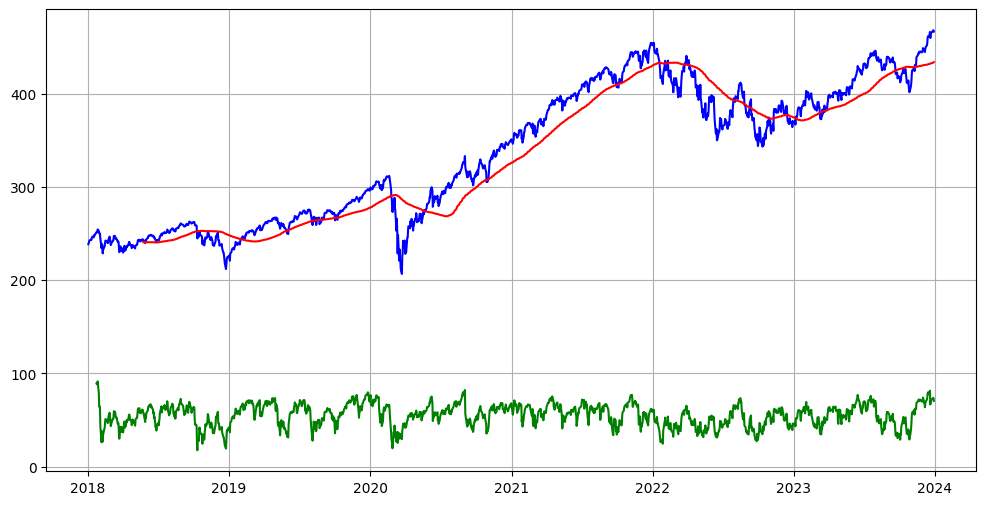

In [39]:
spy["100_sma"] = spy['Close'].rolling(window=100).mean()

plt.figure(figsize=(12,6))


plt.plot(spy.index ,spy['Close'], color="blue")
plt.plot(spy.index, spy["100_sma"], color="red")
plt.plot(spy.index, spy['RSI'], color="green")

plt.grid()

plt.show()

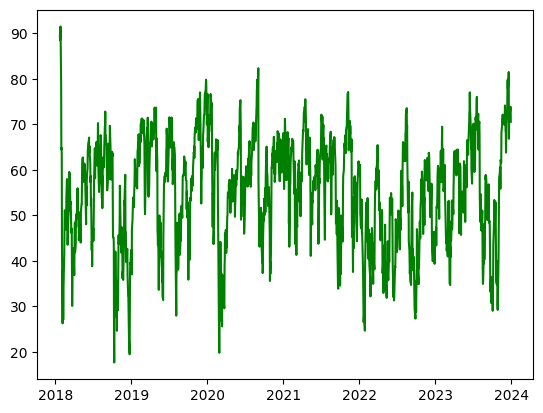

In [40]:
plt.plot(spy.index, spy['RSI'], color="green")

In [41]:
#Take 65 and 40 instead of 30 and 70
spy['RSI'].describe()

count    1495.000000
mean       55.235894
std        11.759849
min        17.669484
25%        46.641279
50%        56.949704
75%        64.124602
max        91.470970
Name: RSI, dtype: float64

In [42]:
rsi_when_price_below_sma = spy.loc[spy['Close'] < spy['100_sma'], 'RSI']
rsi_when_price_below_sma


Date
2018-05-29    48.029896
2018-10-10    23.550528
2018-10-11    17.669484
2018-10-12    29.380426
2018-10-15    27.644079
                ...    
2023-11-03    58.306891
2023-11-06    59.165873
2023-11-07    60.259253
2023-11-08    60.552862
2023-11-09    55.820992
Name: RSI, Length: 391, dtype: float64

In [43]:
#30-35 buy and 48-55 sell might work well

rsi_when_price_below_sma.describe()

count    391.000000
mean      43.353552
std        9.225898
min       17.669484
25%       36.558650
50%       43.502681
75%       50.672284
max       62.736086
Name: RSI, dtype: float64

SHOPIFY


In [3]:
shop = yf.download("SHOP", start = '2018-01-01', end = '2024-01-01')
shop

/var/folders/gx/p5qhhh8s7rg2_ywh443qwth80000gn/T/ipykernel_27422/4198005382.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  shop = yf.download("SHOP", start = '2018-01-01', end = '2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SHOP,SHOP,SHOP,SHOP,SHOP
Date,,,,,
2018-01-02,10.549000,10.572000,10.102000,10.159000,13945000
2018-01-03,10.775000,10.812000,10.617000,10.636000,11627000
2018-01-04,10.995000,11.006000,10.721000,10.833000,11610000
2018-01-05,11.058000,11.177000,10.902000,11.055000,7710000
2018-01-08,11.235000,11.269000,10.999000,10.999000,7487000
...,...,...,...,...,...
2023-12-22,76.830002,77.169998,76.154999,76.449997,6078100
2023-12-26,78.209999,78.464996,76.440002,76.830002,5251800


In [4]:
shop.columns = shop.columns.droplevel('Ticker')

In [5]:
shop.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

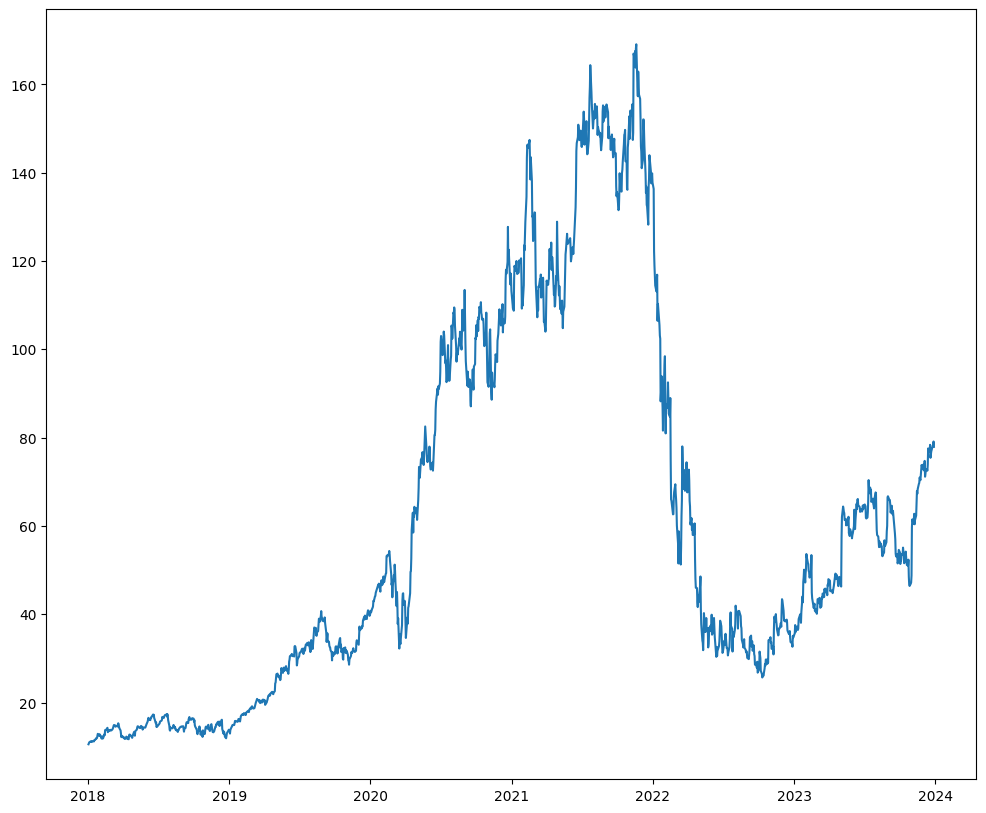

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
plt.plot(shop.index,shop['Close'])


In [8]:
shop.to_csv("/Users/sudhanvabharadwaj/Desktop/Interview_Practice/Regime_Momentum/Data/shop.csv")